In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import plotly.express as ex

import seaborn as sns

In [2]:
data = pd.read_csv("spam.csv", encoding= 'latin-1')
data = data[["class", "message"]]

In [3]:
# data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# print(data.groupby('class').size())

class
ham     4825
spam     747
dtype: int64


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

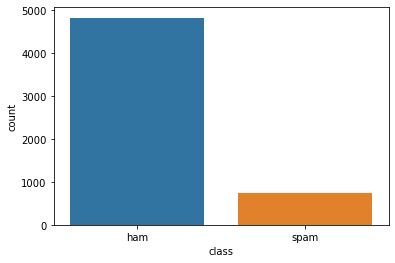

In [5]:
sns.countplot(data['class'])

In [6]:
# data.loc[data["class" ]== "spam"]

,class,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [8]:
## Preparing data for modeling

In [9]:
x = np.array(data["message"])
y = np.array(data["class"])

In [10]:
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data

In [11]:
# Training the Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
## Creating the Model

In [13]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [14]:
## Tesing the Model

In [22]:
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
print(clf.predict(data))

Enter a message:hello
['ham']


In [16]:
## Deploying Model

In [19]:
import streamlit as st
st.title("Spam Detection System")
def spamdetection():
    user = st.text_area("Enter any Message or Email: ")
    if len(user) < 1:
        st.write("Insufficient length")
    else:
        sample = user
        data = cv.transform([sample]).toarray()
        a = clf.predict(data)
        st.title(a)
spamdetection()

2022-12-25 06:12:30.623 
  command:

    streamlit run D:\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
